In [2]:
import pandas as pd
df = pd.read_csv('.\dataset_diabetes\diabetic_data.csv')

array([[<AxesSubplot: title={'center': 'encounter_id'}>,
        <AxesSubplot: title={'center': 'patient_nbr'}>],
       [<AxesSubplot: title={'center': 'admission_type_id'}>,
        <AxesSubplot: title={'center': 'discharge_disposition_id'}>]],
      dtype=object)

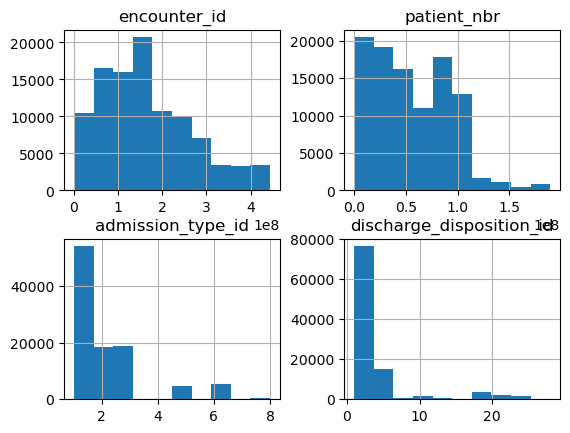

In [49]:
df.iloc[:, 0:8].hist()

array([[<AxesSubplot: title={'center': 'time_in_hospital'}>,
        <AxesSubplot: title={'center': 'num_lab_procedures'}>],
       [<AxesSubplot: title={'center': 'num_procedures'}>,
        <AxesSubplot: title={'center': 'num_medications'}>]], dtype=object)

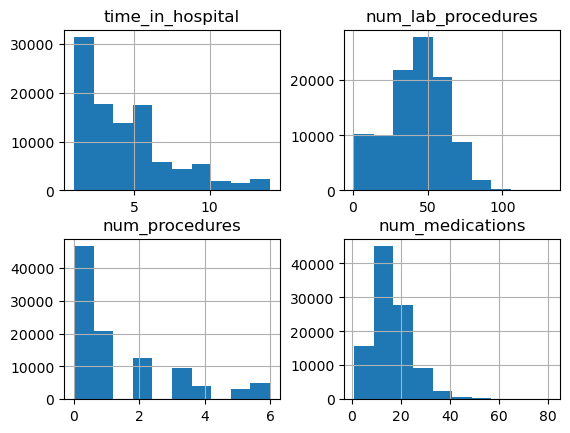

In [51]:
df.iloc[:, 9:15].hist()

array([[<AxesSubplot: title={'center': 'number_emergency'}>,
        <AxesSubplot: title={'center': 'number_inpatient'}>],
       [<AxesSubplot: title={'center': 'number_diagnoses'}>,
        <AxesSubplot: >]], dtype=object)

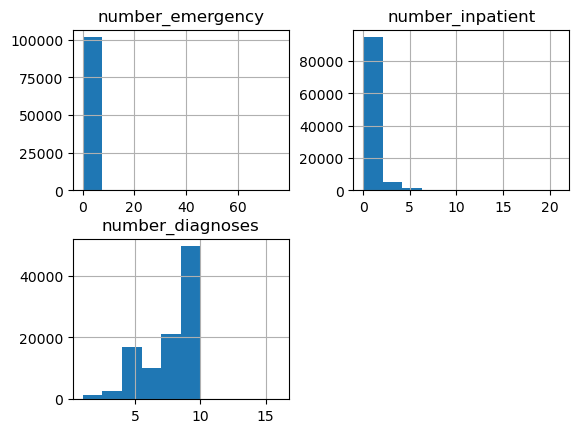

In [52]:
df.iloc[:, 16:].hist()

In [4]:
# 分离数值属性与名义属性
num_columns = ['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications','number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

In [26]:
df_num = df[num_columns]
df_num.head()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,2278392,8222157,6,25,1,1,41,0,1,0,0,0,1
1,149190,55629189,1,1,7,3,59,0,18,0,0,0,9
2,64410,86047875,1,1,7,2,11,5,13,2,0,1,6
3,500364,82442376,1,1,7,2,44,1,16,0,0,0,7
4,16680,42519267,1,1,7,1,51,0,8,0,0,0,5


In [27]:
# 数据归一化
for column in df_num:   # 保持数据类型为dataframe方便后面用.plot画图。。
    if df_num.loc[:,column].min()==df_num.loc[:,column].max():  #避免单值属性计算出bug
        df_num.loc[:,column] = 0
    else:
        df_num.loc[:,column] = (df_num.loc[:,column]-df_num.loc[:,column].min())/(df_num.loc[:,column].max()-df_num.loc[:,column].min())

C:\Users\bignet\AppData\Local\Temp\ipykernel_12016\3842420070.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.loc[:,column] = (df_num.loc[:,column]-df_num.loc[:,column].min())/(df_num.loc[:,column].max()-df_num.loc[:,column].min())


In [28]:
df_num.head()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,0.005105,0.043387,0.714286,0.888889,0.00,0.000000,0.305344,0.000000,0.0000,0.000000,0.0,0.000000,0.000000
1,0.000308,0.293553,0.000000,0.000000,0.25,0.153846,0.442748,0.000000,0.2125,0.000000,0.0,0.000000,0.533333
2,0.000117,0.454072,0.000000,0.000000,0.25,0.076923,0.076336,0.833333,0.1500,0.047619,0.0,0.047619,0.333333
3,0.001099,0.435046,0.000000,0.000000,0.25,0.076923,0.328244,0.166667,0.1875,0.000000,0.0,0.000000,0.400000
4,0.000009,0.224372,0.000000,0.000000,0.25,0.000000,0.381679,0.000000,0.0875,0.000000,0.0,0.000000,0.266667


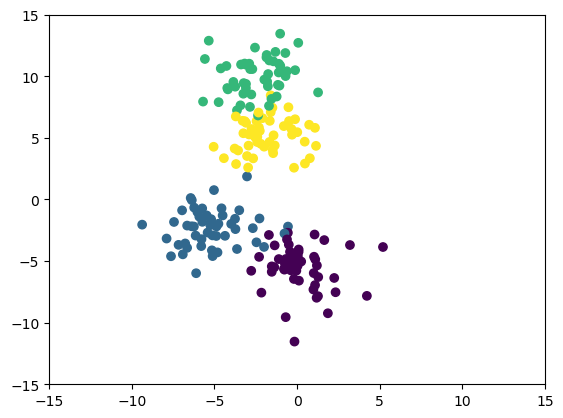

In [10]:
# import statements
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt


# create blobs
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=50)

# create np array for data points
points = data[0]

# create scatter plot
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis')
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.show()

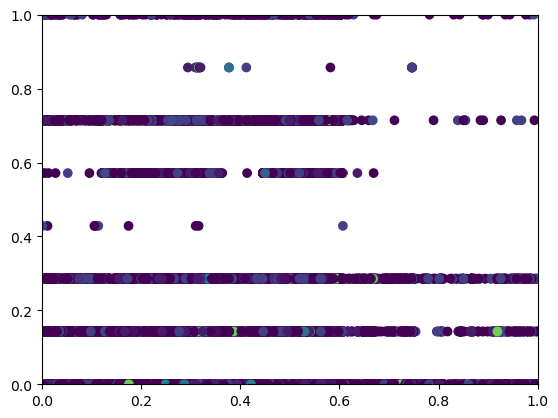

In [34]:
# import statements
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# create scatter plot
plt.scatter(df_num['patient_nbr'], df_num['admission_type_id'], c=df_num['discharge_disposition_id'], cmap='viridis')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

In [12]:
data

(array([[-1.06705283e+00,  9.24306355e+00],
        [ 1.08654318e+00, -6.94815805e+00],
        [-2.30970265e+00,  5.84969440e+00],
        [-1.59728965e+00,  8.45369045e+00],
        [-5.79816711e+00, -3.78405528e+00],
        [-2.29833776e+00, -4.66005371e+00],
        [-1.68210799e+00,  1.12843423e+01],
        [-7.38296450e-01, -5.20135260e+00],
        [-1.92048345e-01, -6.45318764e+00],
        [-6.37920287e+00, -2.17672355e+00],
        [-5.12054803e+00, -2.91449176e+00],
        [-4.22297649e+00,  9.04719945e+00],
        [-2.67815731e+00, -2.32828819e+00],
        [-3.02994109e+00,  1.86959382e+00],
        [-5.73938121e+00, -7.25648845e-01],
        [-1.99427571e+00,  4.28616868e+00],
        [-2.89522086e+00,  1.10222354e+01],
        [-1.11286937e+00,  1.03086380e+01],
        [-5.19987051e+00, -1.59879364e+00],
        [-4.75916597e+00, -1.97047767e+00],
        [-6.76865308e+00, -3.56907573e+00],
        [-2.65715781e+00,  3.33763714e+00],
        [-4.61722463e+00,  1.063

In [13]:
points

array([[-1.06705283e+00,  9.24306355e+00],
       [ 1.08654318e+00, -6.94815805e+00],
       [-2.30970265e+00,  5.84969440e+00],
       [-1.59728965e+00,  8.45369045e+00],
       [-5.79816711e+00, -3.78405528e+00],
       [-2.29833776e+00, -4.66005371e+00],
       [-1.68210799e+00,  1.12843423e+01],
       [-7.38296450e-01, -5.20135260e+00],
       [-1.92048345e-01, -6.45318764e+00],
       [-6.37920287e+00, -2.17672355e+00],
       [-5.12054803e+00, -2.91449176e+00],
       [-4.22297649e+00,  9.04719945e+00],
       [-2.67815731e+00, -2.32828819e+00],
       [-3.02994109e+00,  1.86959382e+00],
       [-5.73938121e+00, -7.25648845e-01],
       [-1.99427571e+00,  4.28616868e+00],
       [-2.89522086e+00,  1.10222354e+01],
       [-1.11286937e+00,  1.03086380e+01],
       [-5.19987051e+00, -1.59879364e+00],
       [-4.75916597e+00, -1.97047767e+00],
       [-6.76865308e+00, -3.56907573e+00],
       [-2.65715781e+00,  3.33763714e+00],
       [-4.61722463e+00,  1.06373187e+01],
       [-1.

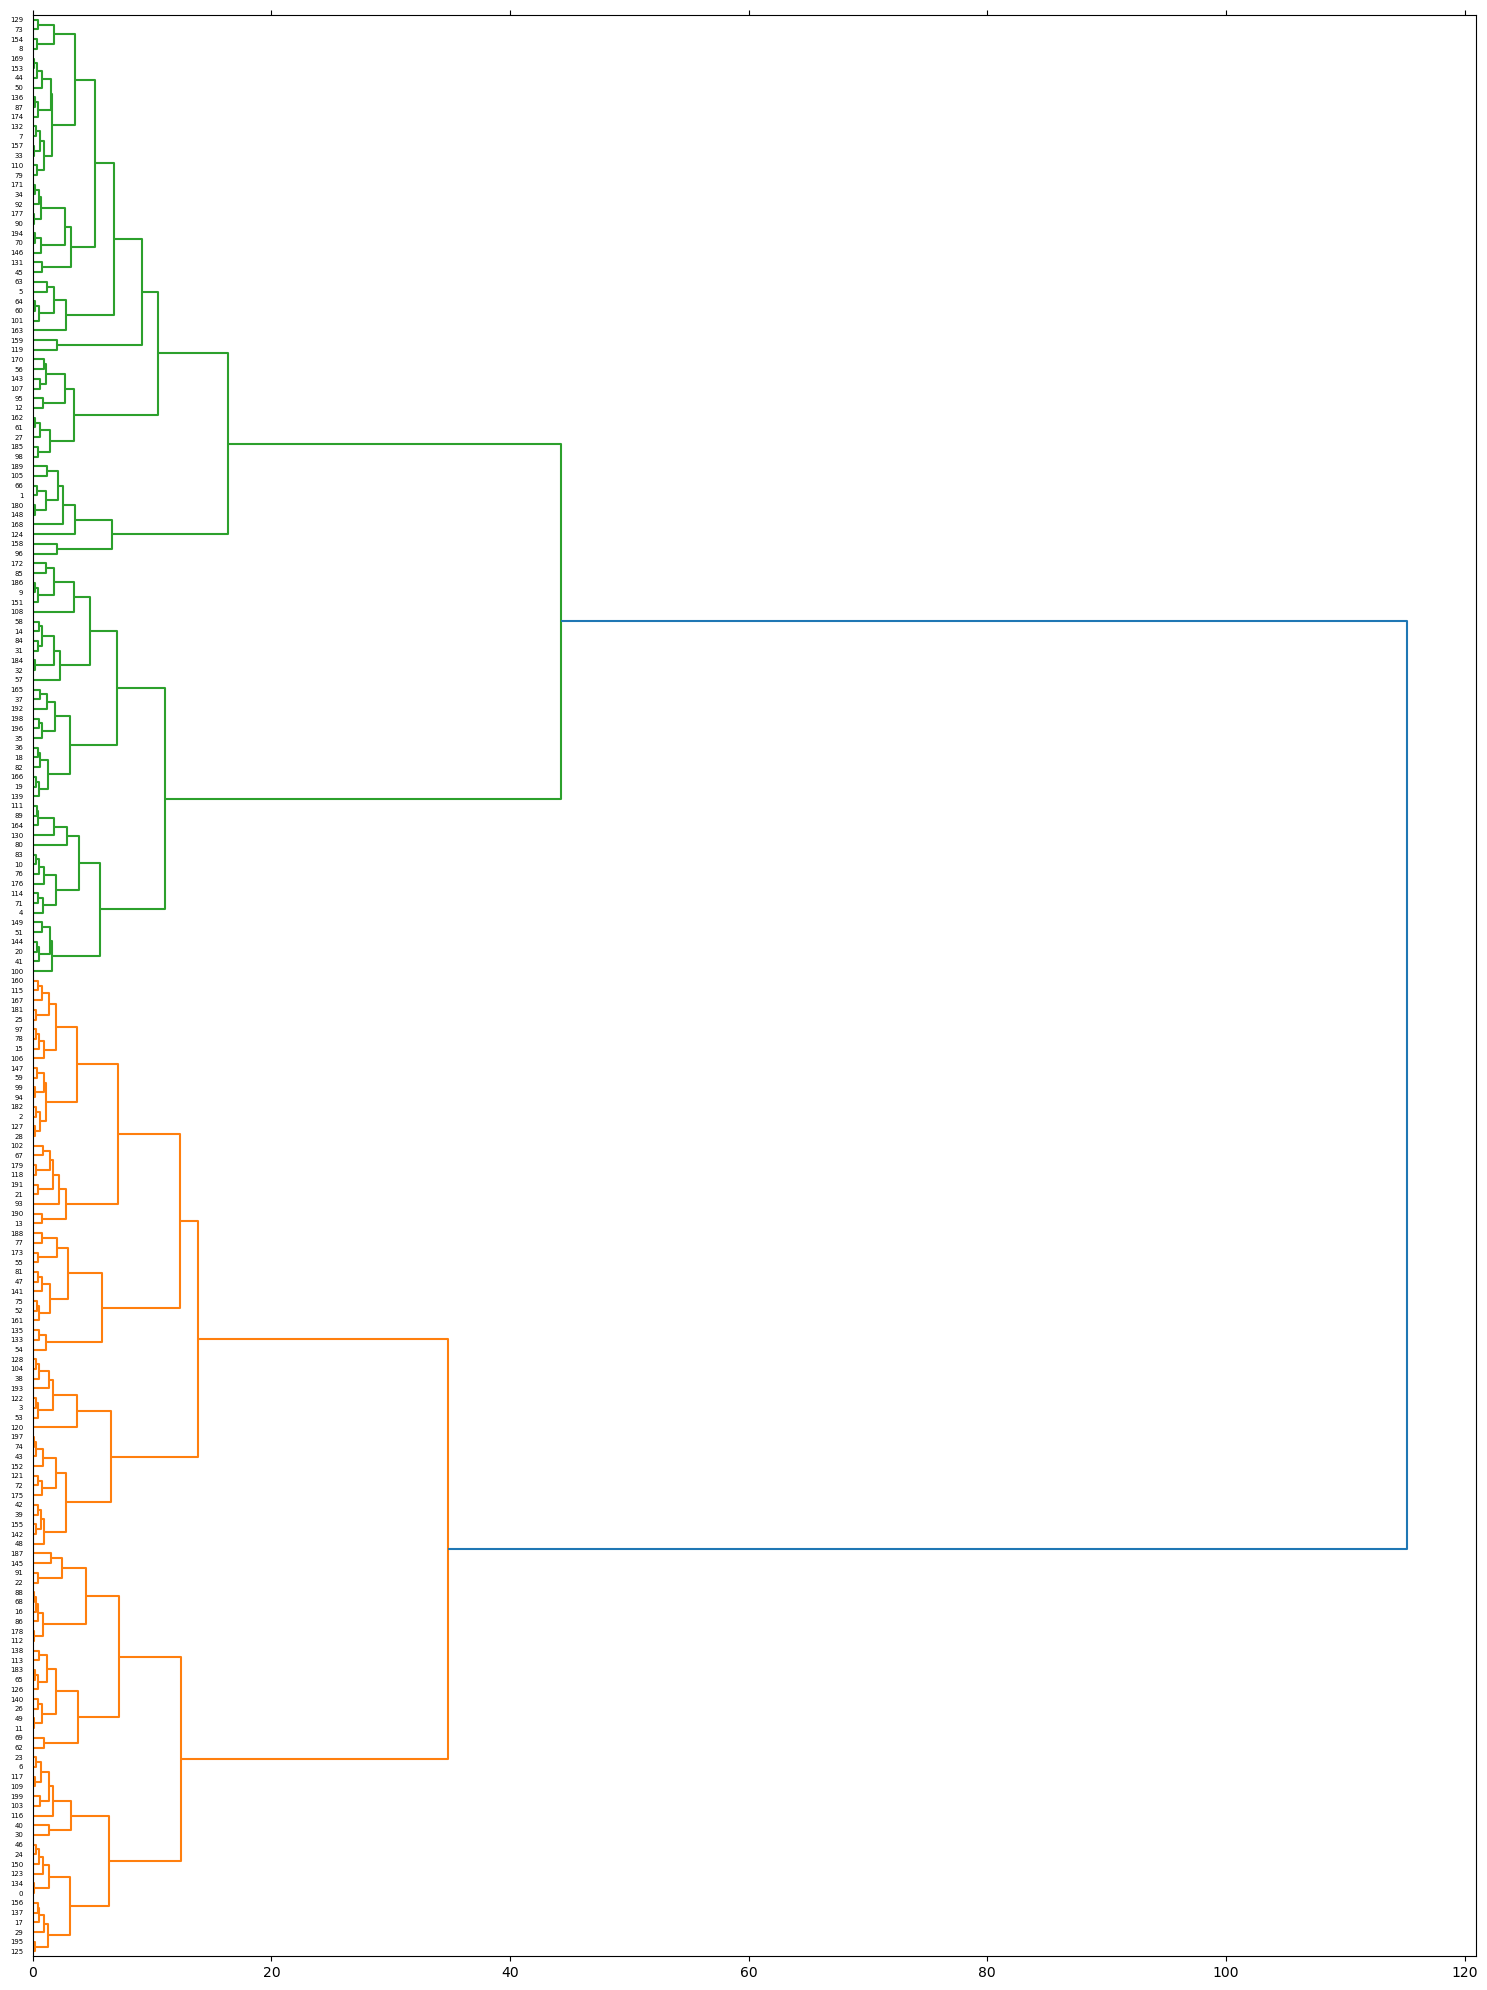

In [18]:
import scipy.cluster.hierarchy as sch

#define distance using euclidean
disMat = sch.distance.pdist(points,'euclidean')

#define the linkage_matrix using ward clustering pre-computed distances
linkage_matrix=sch.linkage(disMat, method ='ward') #optonal :average ward etc

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = sch.dendrogram(linkage_matrix, orientation="right")  #, labels=titles);#可添加label

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

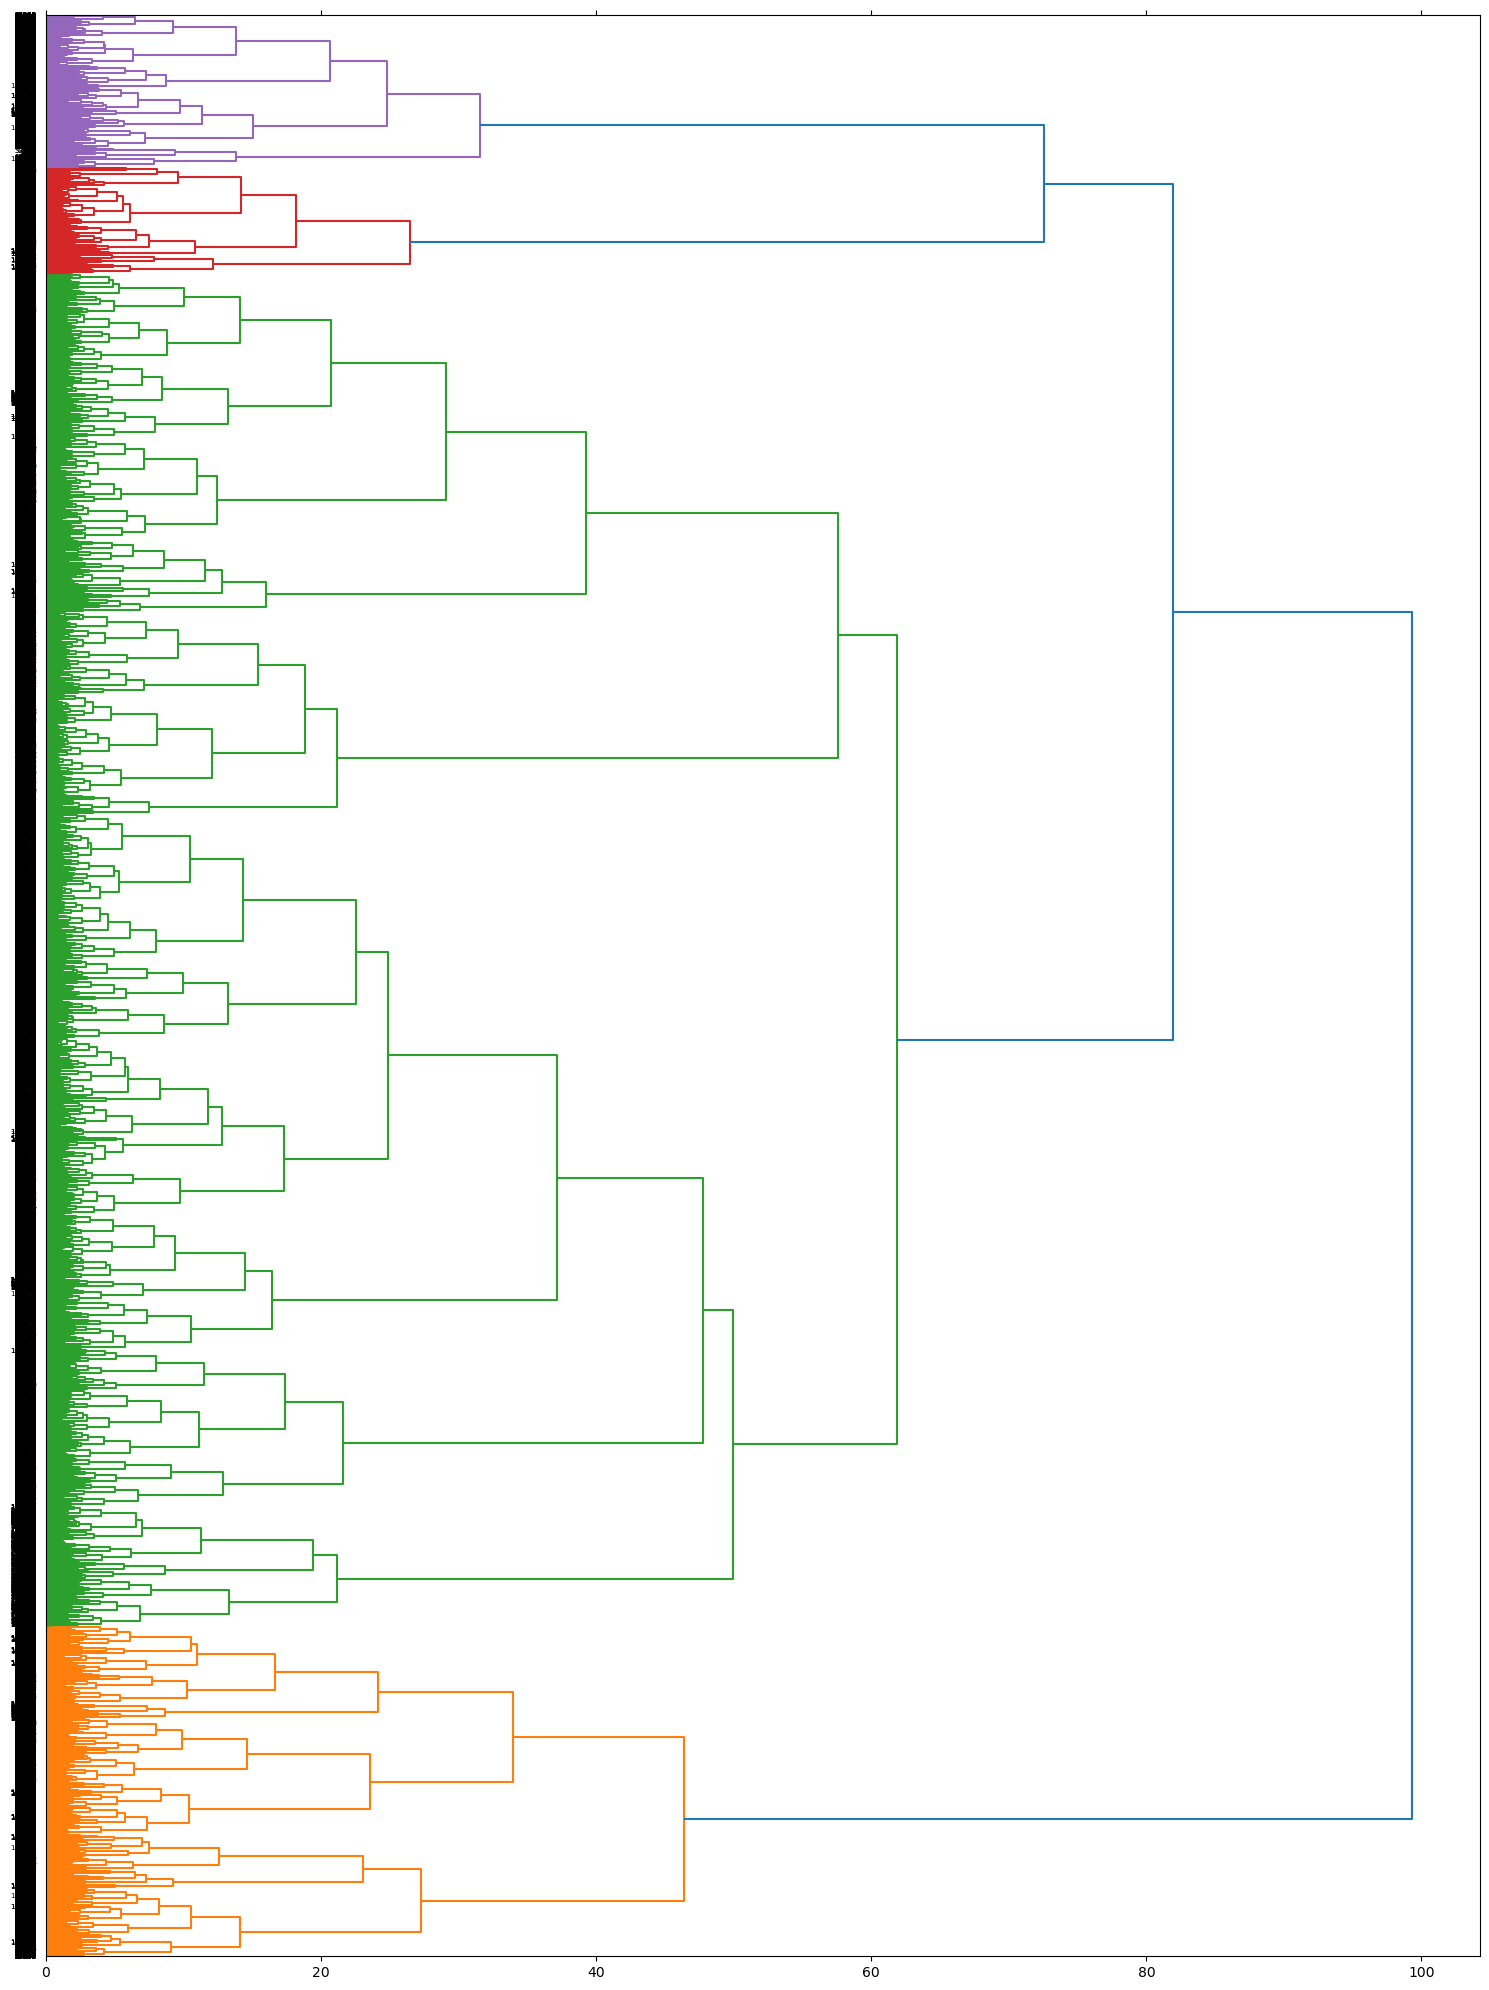

In [53]:
import scipy.cluster.hierarchy as sch

#define distance using euclidean
disMat = sch.distance.pdist(df_num,'euclidean')

#define the linkage_matrix using ward clustering pre-computed distances
linkage_matrix=sch.linkage(disMat, method ='ward') #optonal :average ward etc

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = sch.dendrogram(linkage_matrix, orientation="right")  #, labels=titles);#可添加label

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

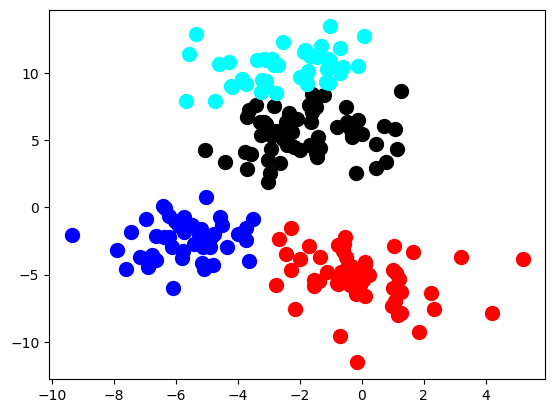

In [19]:
from sklearn.cluster import AgglomerativeClustering

# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(points)


plt.scatter(points[y_hc ==0,0], points[y_hc == 0,1], s=100, c='red')
plt.scatter(points[y_hc==1,0], points[y_hc == 1,1], s=100, c='black')
plt.scatter(points[y_hc ==2,0], points[y_hc == 2,1], s=100, c='blue')
plt.scatter(points[y_hc ==3,0], points[y_hc == 3,1], s=100, c='cyan')

In [55]:
from sklearn.cluster import AgglomerativeClustering

# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(df_num)

InvalidIndexError: (array([False,  True, False, ...,  True,  True,  True]), 0)

In [ ]:
plt.scatter(df_num[y_hc ==0,0], df_num[y_hc == 0,1], s=100, c='red')
plt.scatter(df_num[y_hc==1,0], df_num[y_hc == 1,1], s=100, c='black')
plt.scatter(df_num[y_hc ==2,0], df_num[y_hc == 2,1], s=100, c='blue')
plt.scatter(df_num[y_hc ==3,0], df_num[y_hc == 3,1], s=100, c='cyan')

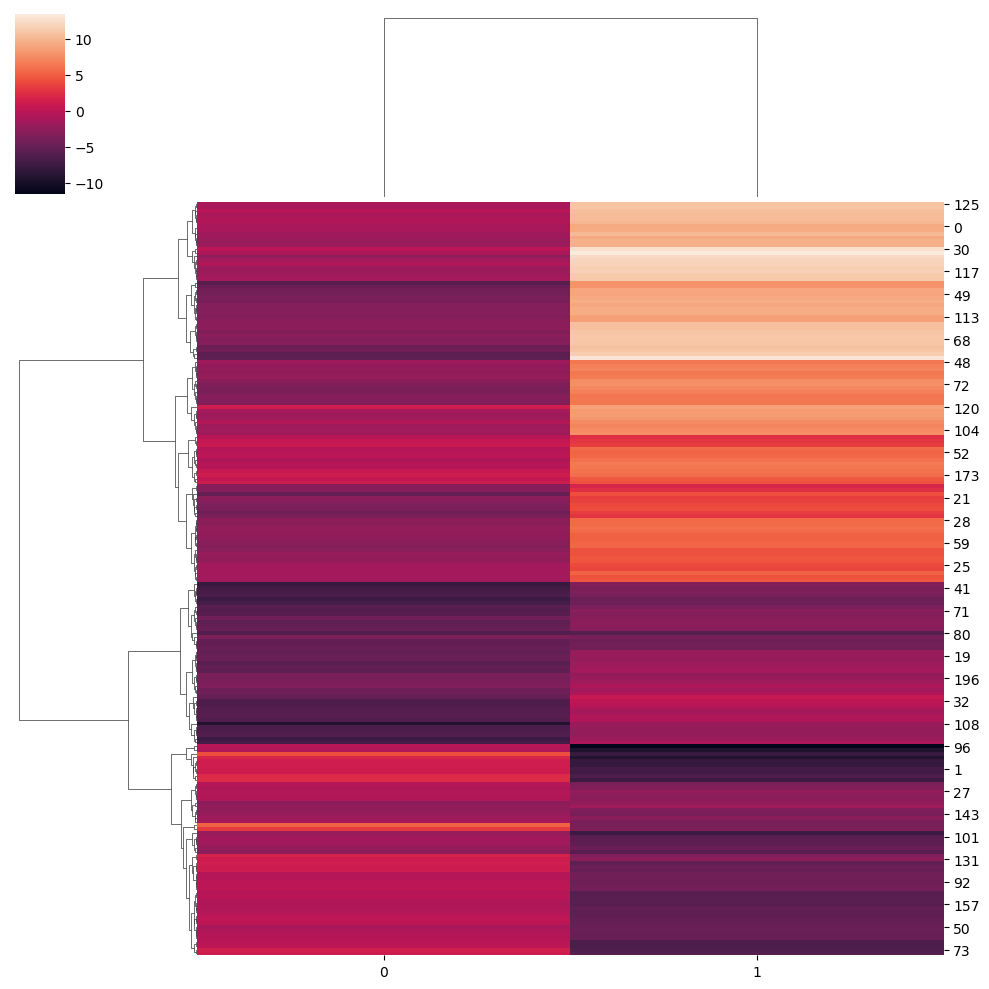

In [21]:
import seaborn as sns

sns.clustermap(points,method ='ward',metric='euclidean')